In [36]:
import cv2
import os
from PIL import Image
import numpy as np
#import Augmentor
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input  
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [3]:
base_path = os.path.join('/kaggle/input/birad-mamo3/BIRAD-mamo3/BIRAD-mamo')
dir_path = os.listdir(base_path)
dir_path.reverse()
print(dir_path)
files = []
labels = []

['normalB1', 'benignB3', 'malignantB45']


In [4]:
def img_preprocessing(img_path):
    img = load_img(img_path, target_size=(224, 224)) 
    img = img_to_array(img)  # Convert to NumPy array
    #img = np.expand_dims(img, axis=0)# Add a batch dimension (needed for the model)
    img = preprocess_input(img)  
    return img

In [5]:
for i, img_class in enumerate(dir_path):
    for image in os.listdir(os.path.join(base_path,img_class)):
        img_path = os.path.join(base_path,img_class,image)
        img_array = img_preprocessing(img_path)
        files.append(img_array)
        labels.append(i)

In [6]:
indices = np.arange(len(files))
np.random.shuffle(indices)
m_files = []
m_labels = []
for indice in indices:
    m_files.append(files[indice])
    m_labels.append(labels[indice])

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
x_train, x_test, y_train, y_test = train_test_split(m_files, m_labels, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [9]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [10]:
count_0_val = np.sum(y_val == 0)
count_1_val = np.sum(y_val == 1)
count_2_val = np.sum(y_val == 2)

count_0_train = np.sum(y_train == 0)
count_1_train = np.sum(y_train == 1)
count_2_train = np.sum(y_train == 2)

count_0_test = np.sum(y_test == 0)
count_1_test = np.sum(y_test == 1)
count_2_test = np.sum(y_test == 2)

print(count_0_val, count_1_val, count_2_val)
print(count_0_train, count_1_train, count_2_train)
print(count_0_test, count_1_test, count_2_test)

193 180 201
837 757 699
243 250 224


In [11]:
y_train_encoded = to_categorical(y_train, num_classes=3)
#print(f'1: {y_train_encoded}')
y_train_encoded = y_train_encoded.reshape(-1, 3) 
#print(f'2: {y_train_encoded}')

y_val_encoded = to_categorical(y_val, num_classes=3)
y_val_encoded = y_val_encoded.reshape(-1, 3)


#x_test = to_categorical(y_train, num_classes=3)
#y_test = to_categorical(y_train, num_classes=3)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,Activation
from tensorflow.keras.initializers import GlorotUniform, HeNormal
import matplotlib.pyplot as plt
from keras import regularizers
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.models import save_model
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model

In [43]:
#base1 = DenseNet121(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/chexnet-keras-weights/brucechou1983_CheXNet_Keras_0.3.0_weights.h5", by_name=True, skip_mismatch=True)
#base1.load_weights("/kaggle/input/radimagenet-densenet121/RadImageNet-DenseNet121_notop.h5")

#base1 = InceptionV3(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-inceptionv3/RadImageNet-InceptionV3_notop.h5")

#base1 = InceptionResNetV2(weights=None, include_top=False, input_shape=(224,224,3))
#base1.load_weights("/kaggle/input/radimagenet-irv2/RadImageNet-IRV2_notop.h5")

base1 = ResNet50(weights=None, include_top=False, input_shape=(224,224,3))
base1.load_weights("/kaggle/input/radimagenet-resnet50-notop/RadImageNet-ResNet50_notop.h5")

In [46]:
base1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 4,459,520 (17.01 MB)

 Non-trainable params: 19,128,192 (72.97 MB)

In [45]:
base1.trainable = True

set_trainable = False

for layer in base1.layers:
    if layer.name in ['conv5_block3_1_conv','conv5_block3_2_conv','conv5_block3_3_conv']:
        layer.trainable = True
    else:
        layer.trainable = False          

<KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_878>
<KerasTensor shape=(None, 50176), dtype=float32, sparse=False, name=keras_tensor_879>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_880>
<KerasTensor shape=(None, 51200), dtype=float32, sparse=False, name=keras_tensor_881>

In [20]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model1 = Model(inputs, outputs)

model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=15, batch_size=96) 

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3436 - loss: 1.4214 - val_accuracy: 0.3362 - val_loss: 1.1213
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.4805 - loss: 1.0182 - val_accuracy: 0.5871 - val_loss: 0.9815
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5775 - loss: 0.9565 - val_accuracy: 0.6359 - val_loss: 0.9033
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6057 - loss: 0.8979 - val_accuracy: 0.5976 - val_loss: 0.8733
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.5994 - loss: 0.8737 - val_accuracy: 0.6481 - val_loss: 0.8393
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5896 - loss: 0.8561 - val_accuracy: 0.6429 - val_loss: 0.8182
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.6081 - loss: 0.8315 - val_accuracy: 0.6080 - val_loss: 0.7959
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.6078 - loss: 0.8319 - val_accuracy: 0.58

In [21]:
model1.save('chex_121.h5')

In [26]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model2 = Model(inputs, outputs)

model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=10, batch_size=96) 

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.4159 - loss: 2.4078 - val_accuracy: 0.5923 - val_loss: 0.9119
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.5774 - loss: 0.9589 - val_accuracy: 0.6237 - val_loss: 0.7464
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6036 - loss: 0.7929 - val_accuracy: 0.6237 - val_loss: 0.7697
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5958 - loss: 0.7700 - val_accuracy: 0.6237 - val_loss: 0.6909
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6215 - loss: 0.7231 - val_accuracy: 0.6272 - val_loss: 0.6731
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6406 - loss: 0.7513 - val_accuracy: 0.6289 - val_loss: 0.6650
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.6387 - loss: 0.7280 - val_accuracy: 0.6394 - val_loss: 0.7001
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6426 - loss: 0.7410 - val_accuracy: 0.62

In [27]:
model2.save('Rad_121.h5')

In [34]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model3 = Model(inputs, outputs)

model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=20, batch_size=96) 

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 707ms/step - accuracy: 0.4703 - loss: 1.0450 - val_accuracy: 0.6254 - val_loss: 0.8554
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6127 - loss: 0.8313 - val_accuracy: 0.6028 - val_loss: 0.8086
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6128 - loss: 0.7910 - val_accuracy: 0.6098 - val_loss: 0.7919
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6245 - loss: 0.7700 - val_accuracy: 0.6237 - val_loss: 0.7540
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6319 - loss: 0.7437 - val_accuracy: 0.6429 - val_loss: 0.7354
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6424 - loss: 0.7286 - val_accuracy: 0.6220 - val_loss: 0.7385
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6546 - loss: 0.7124 - val_accuracy: 0.6585 - val_loss: 0.7158
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.6537 - loss: 0.7037 - val_accuracy: 0

In [35]:
model3.save('Rad_V3.h5')

In [41]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model4 = Model(inputs, outputs)

model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=15, batch_size=96) 

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4743 - loss: 0.9922 - val_accuracy: 0.6132 - val_loss: 0.7866
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6358 - loss: 0.7616 - val_accuracy: 0.6533 - val_loss: 0.7174
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.6536 - loss: 0.7103 - val_accuracy: 0.6446 - val_loss: 0.7006
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6651 - loss: 0.6872 - val_accuracy: 0.6725 - val_loss: 0.6525
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.6992 - loss: 0.6269 - val_accuracy: 0.6812 - val_loss: 0.6555
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.7242 - loss: 0.6174 - val_accuracy: 0.6969 - val_loss: 0.6271
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.7407 - loss: 0.5913 - val_accuracy: 0.7056 - val_loss: 0.6279
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.7289 - loss: 0.5815 - val_accuracy: 0.70

In [42]:
model4.save('Rad_IRV2.h5')

In [48]:
inputs = base1.input

x = GlobalAveragePooling2D()(base1.output)
y = Flatten()(base1.output)

z = Concatenate(axis=-1)([x, y])

outputs = Dense(3, activation='softmax')(z)

model5 = Model(inputs, outputs)

model5.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train_encoded ,validation_data=(x_val,y_val_encoded), epochs=15, batch_size=96) 

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 561ms/step - accuracy: 0.4560 - loss: 1.9152 - val_accuracy: 0.6028 - val_loss: 0.8612
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.5990 - loss: 0.8224 - val_accuracy: 0.6010 - val_loss: 0.7188
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6270 - loss: 0.7133 - val_accuracy: 0.6551 - val_loss: 0.6741
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6580 - loss: 0.6909 - val_accuracy: 0.6620 - val_loss: 0.6728
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6531 - loss: 0.6709 - val_accuracy: 0.6725 - val_loss: 0.6604
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.6696 - loss: 0.6684 - val_accuracy: 0.6481 - val_loss: 0.6831
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6667 - loss: 0.6540 - val_accuracy: 0.6376 - val_loss: 0.6763
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6705 - loss: 0.6242 - val_accuracy: 0

In [49]:
model5.save('Rad_50.h5')

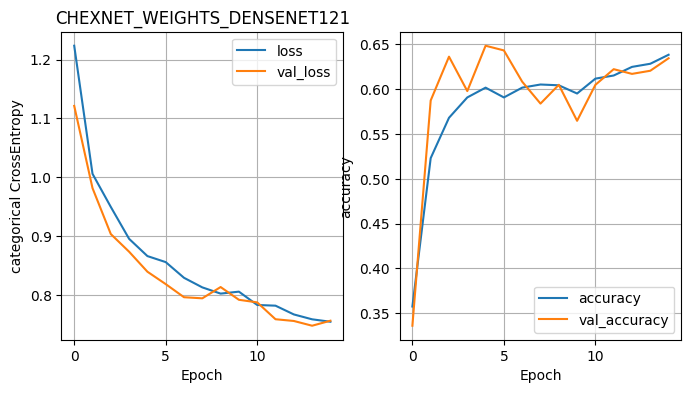

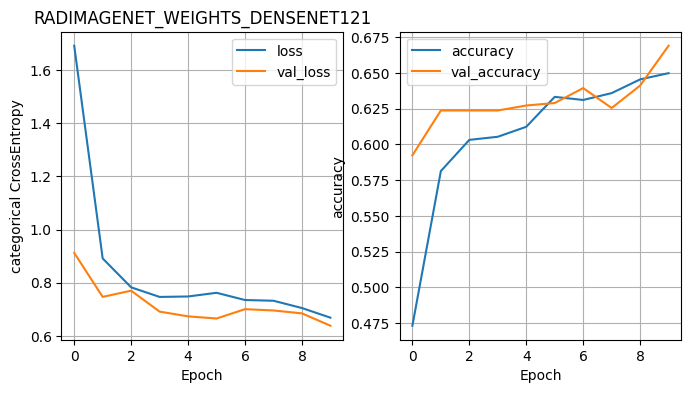

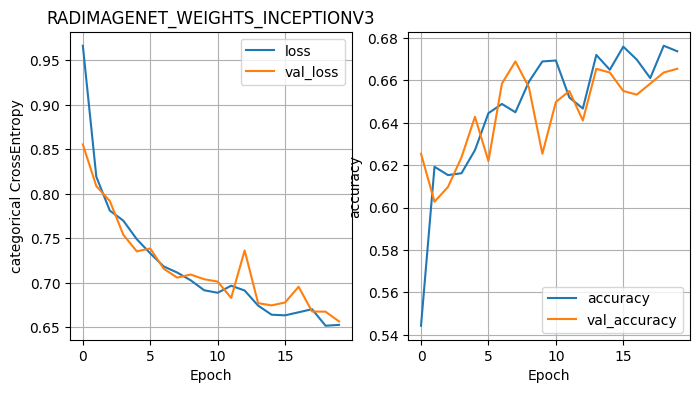

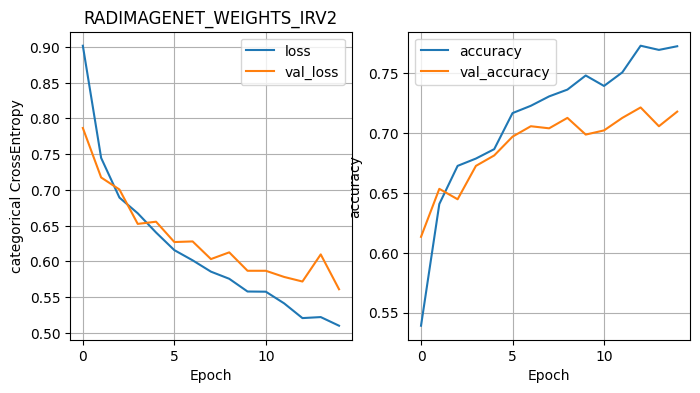

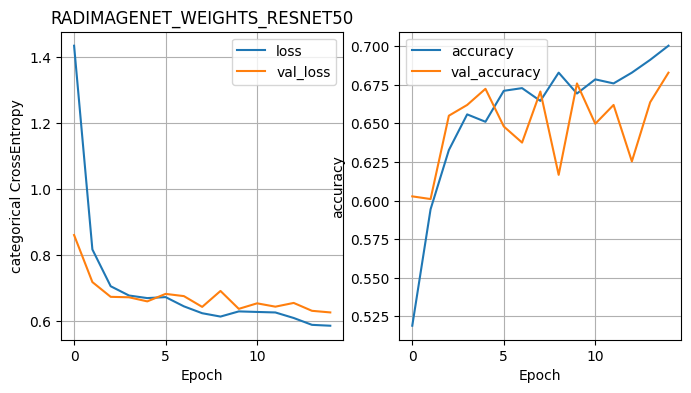

In [50]:
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('categorical CrossEntropy')
    ax1.legend() 
    ax1.grid(True)
    ax1.set_title(title)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

plot_history(history1,'CHEXNET_WEIGHTS_DENSENET121')
plot_history(history2,'RADIMAGENET_WEIGHTS_DENSENET121')
plot_history(history3,'RADIMAGENET_WEIGHTS_INCEPTIONV3')
plot_history(history4,'RADIMAGENET_WEIGHTS_IRV2')
plot_history(history5,'RADIMAGENET_WEIGHTS_RESNET50')

In [51]:
from sklearn.metrics import classification_report

# Assuming y_test is the true labels and x_test is the test data

models = [model1, model2, model3, model4, model5]  # Assuming model1, model2, and model3 are your three models
model_names = ['CHEXNET_WEIGHTS_DENSENET_121', 'RADIMAGENET_WEIGHTS_DENSENET_121','RADIMAGENET_WEIGHTS_INCEPTIONV3','RADIMAGENET_WEIGHTS_IRV2','RADIMAGENET_WEIGHTS_RESNET50' ]

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    y_pred = (y_pred > 0.5).astype(int)
    y_pred = np.argmax(y_pred, axis=1)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print()

23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 863ms/step
Classification Report for CHEXNET_WEIGHTS_DENSENET_121:
              precision    recall  f1-score   support

           0       0.39      0.92      0.55       243
           1       0.59      0.24      0.34       250
           2       0.59      0.10      0.17       224

    accuracy                           0.43       717
   macro avg       0.52      0.42      0.36       717
weighted avg       0.52      0.43      0.36       717


23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 426ms/step
Classification Report for RADIMAGENET_WEIGHTS_DENSENET_121:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68       243
           1       0.55      0.48      0.51       250
           2       0.57      0.42      0.48       224

    accuracy                           0.57       717
   macro avg       0.57      0.57      0.56       717
weighted avg       0.57      0.57      0.56       717


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 491ms